In [3]:
import pandas as pd
import sqlalchemy
import mysql.connector
import csv
import missingno as msno 
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import re
import matplotlib as mpl    
from matplotlib.patches import Patch


plt.style.use('seaborn')
sns.set_style('whitegrid')
%matplotlib inline



#Pour que python reconnaisse un dossier comme un module il faut ajouter en son sein un fichier __init__.py 
#et également l'ajouter au PATH

import sys  
data = pd.read_csv('/home/apprenant/Desktop/FARIZD/EDA/Data/ee654666-9d19-402e-9b80-5b70e4bcfe2d.csv')



#On peut ensuite importer le dossier comme un module


In [4]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
print(data.head())



   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

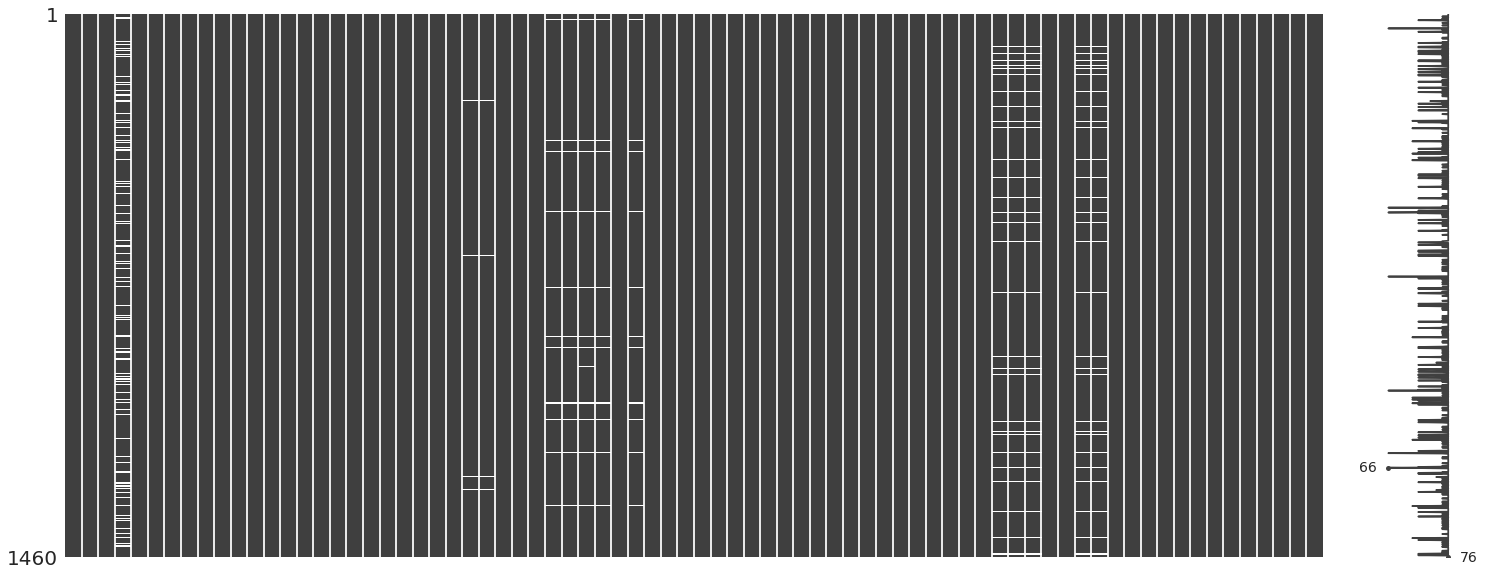

In [22]:
msno.matrix(data)

## Donnée plutot propre au niveau du remplissage des variables

In [27]:
def num_missing(x):
    return sum(x.isnull())

print(data.apply(num_missing, axis=0).values)

[  0   0   0 259   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   8   8   0   0   0  37  37  38  37   0  38   0
   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  81  81  81   0   0  81  81   0   0   0   0   0   0   0   0   0
   0   0   0   0]


In [28]:
def num_missing(x):
    return sum(x.isnull())
# On applique cette fonction pour chaque colonne:
print("Valeurs manquantes par colonne:")
print(data.apply(num_missing, axis=0))

Valeurs manquantes par colonne:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64


In [13]:
count_null = data.isnull().sum()/ data.shape[0] * 100
count_null

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

### Count_null me permet d'avoir les info en pourcentage des données manquantes 

In [14]:
#Empty Column >= 100%
null_col = count_null[count_null >= 31].index
null_col

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

### Grâce au pourcentage récuppérer cette ligne me permet d'avoir les noms de colonnes qui ont plus de 30% des données manquantes

In [ ]:
data = data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1) 

### Je supprime donc les colonnes avec plus de 30% de données manquante  je verifie en dessous combien il me reste de colonnes 76 c'est correct car au début nous étions à 81

In [19]:
data.shape

(1460, 76)

In [62]:
d

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_en' 'origins' 'origins_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_en' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities' 'cities_tags' 'purchase_places' 'stores' 'countries'
 'countries_tags' 'countries_en' 'ingredients_text' 'allergens'
 'allergens_en' 'traces' 'traces_tags' 'traces_en' 'serving_size'
 'additives_n' 'additives' 'additives_tags' 'additives_en'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_fr'
 'pnns_groups_1' 'pnns_groups_2' 'states' 'states_tags' 'states_en'
 'main_category' 'main_category_en' 'image_url' 'image_small_url'
 'energy_100g' 'energy-from-fa

### Maintenant j'identifie les métadonnées et les supprimes car non utile 

In [63]:
data = data.drop(['code','url','creator','created_t','created_datetime','last_modified_t'
,'last_modified_datetime'], axis=1) 

In [64]:
data.shape

(356027, 129)

In [68]:
print(data.columns.values)

['product_name' 'generic_name' 'quantity' 'packaging' 'packaging_tags'
 'brands' 'brands_tags' 'categories' 'categories_tags' 'categories_en'
 'origins' 'origins_tags' 'manufacturing_places'
 'manufacturing_places_tags' 'labels' 'labels_tags' 'labels_en'
 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo' 'cities'
 'cities_tags' 'purchase_places' 'stores' 'countries' 'countries_tags'
 'countries_en' 'ingredients_text' 'allergens' 'allergens_en' 'traces'
 'traces_tags' 'traces_en' 'serving_size' 'additives_n' 'additives'
 'additives_tags' 'additives_en' 'ingredients_from_palm_oil_n'
 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_fr'
 'pnns_groups_1' 'pnns_groups_2' 'states' 'states_tags' 'states_en'
 'main_category' 'main_category_en' 'image_url' 'image_small_url'
 'energy_100g' 'energy-from-fat_100g' 'fat_100g' 'saturated-fat_100g'
 '-arachidic-acid_100g' '-behenic-acid_100g' 'monounsatura

## J'imprime mes colonnes et je choisie celle que je vais garder

In [69]:
data = data[['countries', 'categories', 'product_name', 'energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'saturated-fat_100g','fat_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr','additives_n','additives','additives_tags']]

In [70]:
data.head()

countries categories                    product_name  energy_100g  \
0     en:FR        NaN              Farine de blé noir          NaN   
1        US        NaN  Banana Chips Sweetened (Whole)       2243.0   
2        US        NaN                         Peanuts       1941.0   
3        US        NaN          Organic Salted Nut Mix       2540.0   
4        US        NaN                 Organic Polenta       1552.0   

   sugars_100g  fiber_100g  proteins_100g  sodium_100g  saturated-fat_100g  \
0          NaN         NaN            NaN          NaN                 NaN   
1        14.29         3.6           3.57        0.000               28.57   
2        17.86         7.1          17.86        0.250                0.00   
3         3.57         7.1          17.86        0.482                5.36   
4          NaN         5.7           8.57          NaN                 NaN   

   fat_100g  nutrition-score-fr_100g nutrition_grade_fr  additives_n  \
0       NaN                      NaN                NaN          NaN   
1     28.57                     14.0                  d          0.0   
2     17.86                      0.0                  b          0.0   
3     57.14                     12.0                  d          0.0   
4      1.43                      NaN                NaN          0.0   

                                           additives additives_tags  
0                                                NaN            NaN  
1   [ bananas -> en:bananas  ]  [ vegetable-oil -...            NaN  
2   [ peanuts -> en:peanuts  ]  [ wheat-flour -> ...            NaN  
3   [ organic-hazelnuts -> en:organic-hazelnuts  ...            NaN  
4   [ organic-polenta -> en:organic-polenta  ]  [...            NaN

In [71]:
data.shape

(356027, 15)

In [72]:
print(data.duplicated(['product_name']).value_counts()) 

False    249246
True     106781
dtype: int64


In [73]:
data.drop_duplicates(['product_name'], inplace=True)

## je compte les doublons dans product_name et les supprimes 

In [74]:
print(data.duplicated(['product_name']).value_counts()) 

False    249246
dtype: int64


In [75]:
data = data[data["product_name"].isnull() == False]

In [76]:
data.shape

(249245, 15)

Text(0.5, 1.0, 'countries')

  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/apprenant/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/apprenant/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/apprenant/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/apprenant/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/apprenant/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/apprenant/anaconda3/lib/python3.8

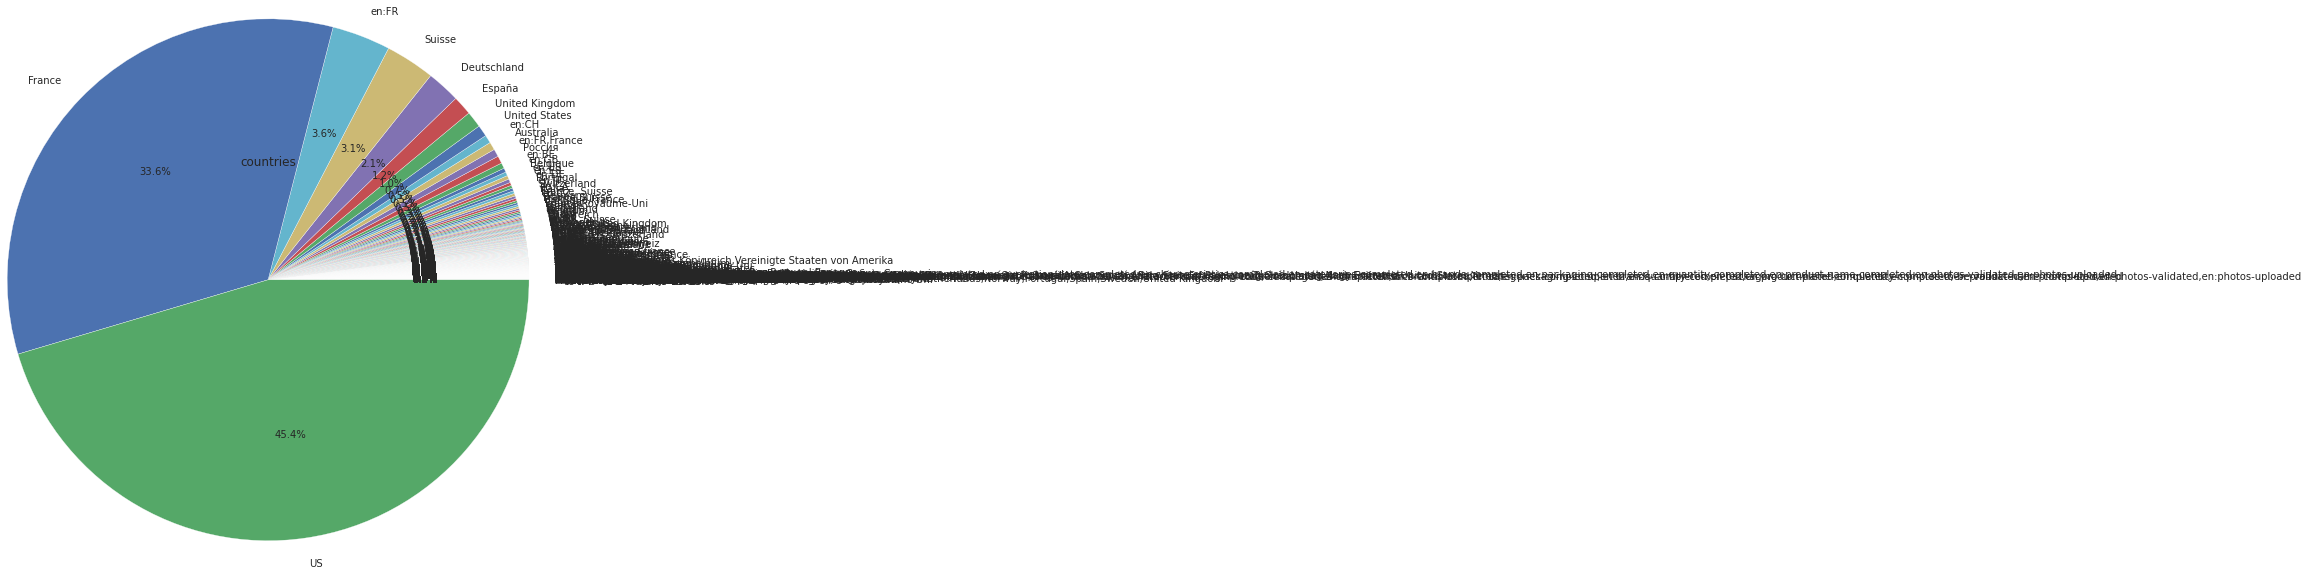

In [77]:
dat = data.groupby("countries").countries.count().sort_values()
dat.plot.pie(autopct="%.1f%%", radius=3)
plt.title("countries")

In [78]:
print (data[['countries']].sample(n=30))

         countries
248039      France
196525      France
161044          US
584         France
12101           US
320111      Suisse
98445           US
312250  Madagascar
195867      France
53470           US
142502          US
54350           US
218509      France
250031       en:FR
160933          US
83523           US
40800           US
9365            US
345871       en:CZ
155983          US
331797      France
120569          US
337211      France
206758      France
108464          US
77082           US
325078      Suisse
162498          US
155780          US
304514      France


In [79]:
data["countries"] = data["countries"].apply(
    lambda x: "France" if re.match(r".*(fr).*", str(x), re.IGNORECASE) else x )


In [80]:
data.countries == 'France'

0          True
1         False
2         False
3         False
4         False
          ...  
356021    False
356022    False
356023    False
356024     True
356025     True
Name: countries, Length: 249245, dtype: bool

## J'instegre tout les FR dans france et je ne garde plus que france dans country

In [81]:
data = data.loc[data.countries == 'France']

In [82]:
data.head()

countries     categories          product_name  energy_100g  sugars_100g  \
0      France            NaN    Farine de blé noir          NaN          NaN   
46     France            NaN   Naturablue original          NaN          NaN   
47     France  Filet de bœuf         Filet de bœuf          NaN          NaN   
51     France            NaN  Naturakrill original          NaN          NaN   
108    France            NaN        Lion Peanut x2          NaN          NaN   

     fiber_100g  proteins_100g  sodium_100g  saturated-fat_100g  fat_100g  \
0           NaN            NaN          NaN                 NaN       NaN   
46          NaN            NaN          NaN                 NaN       NaN   
47          NaN            NaN          NaN                 NaN       NaN   
51          NaN            NaN          NaN                 NaN       NaN   
108         NaN            NaN          NaN                 NaN       NaN   

     nutrition-score-fr_100g nutrition_grade_fr  additives_n additives  \
0                        NaN                NaN          NaN       NaN   
46                       NaN                NaN          NaN       NaN   
47                       NaN                NaN          NaN       NaN   
51                       NaN                NaN          NaN       NaN   
108                      NaN                NaN          NaN       NaN   

    additives_tags  
0              NaN  
46             NaN  
47             NaN  
51             NaN  
108            NaN

Text(0.5, 1.0, 'countries')

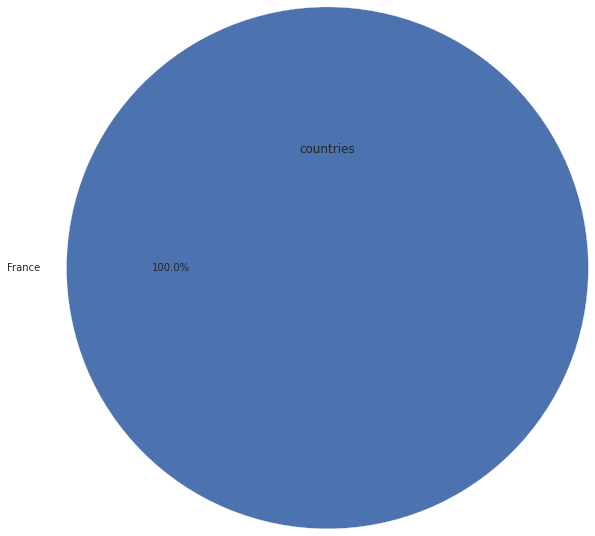

In [83]:
dat = data.groupby("countries").countries.count().sort_values()
dat.plot.pie(autopct="%.1f%%", radius=3)
plt.title("countries")

In [84]:
data.shape

(98144, 15)

In [85]:
data["product_name"].isnull().sum() 

0

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98144 entries, 0 to 356025
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   countries                98144 non-null  object 
 1   categories               58924 non-null  object 
 2   product_name             98144 non-null  object 
 3   energy_100g              77135 non-null  float64
 4   sugars_100g              75698 non-null  float64
 5   fiber_100g               51886 non-null  float64
 6   proteins_100g            76940 non-null  float64
 7   sodium_100g              75730 non-null  float64
 8   saturated-fat_100g       75624 non-null  float64
 9   fat_100g                 64300 non-null  float64
 10  nutrition-score-fr_100g  74482 non-null  float64
 11  nutrition_grade_fr       74482 non-null  object 
 12  additives_n              68784 non-null  float64
 13  additives                68767 non-null  object 
 14  additives_tags       

In [87]:
data = data.dropna(subset=['fat_100g','energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'saturated-fat_100g'],how ='all')

## Je supprimes les lignes qui manque dans toutes les colonnes suivante

In [88]:
data.head()

countries                                         categories  \
140    France                                                NaN   
185    France  Boissons,Boissons gazeuses,Sodas,Boissons sucr...   
189    France                  Snacks sucrés,Confiseries,Bonbons   
190    France                                       en:beverages   
193    France                                                NaN   

                                          product_name  energy_100g  \
140                                     Pack de 2 Twix       1481.0   
185                                          Root Beer        215.0   
189      Gotta-have grape, seriously strawberry flavor       1667.0   
190              Thé noir aromatisé violette et fleurs         17.0   
193  Preparation mug cake chocolat-caramel au beurr...       1632.0   

     sugars_100g  fiber_100g  proteins_100g  sodium_100g  saturated-fat_100g  \
140          NaN         6.2           6.25          NaN                 NaN   
185         13.6         0.0           0.00     0.024200                 0.0   
189         93.3         NaN           0.00     0.000000                 0.0   
190          0.1         NaN           0.10     0.000394                 0.1   
193         42.0         0.0           7.00     0.383858                 4.5   

     fat_100g  nutrition-score-fr_100g nutrition_grade_fr  additives_n  \
140      4.17                      NaN                NaN          NaN   
185      0.00                     18.0                  e          3.0   
189      0.00                     14.0                  d          NaN   
190      0.10                      2.0                  c          0.0   
193      7.00                     21.0                  e          4.0   

                                             additives  \
140                                                NaN   
185   [ eau-gazeifiee -> fr:eau-gazeifiee  ]  [ eau...   
189                                                NaN   
190   [ the-noir-aromatise-a-la-fleur-de-violette -...   
193   [ farine-de-ble -> fr:farine-de-ble  ]  [ far...   

                                        additives_tags  
140                                                NaN  
185                            en:e150,en:e211,en:e999  
189                                                NaN  
190                                                NaN  
193  en:e322,en:e322i,en:e450,en:e473,en:e500,en:e5...

In [89]:
data.shape

(77599, 15)

<AxesSubplot:>

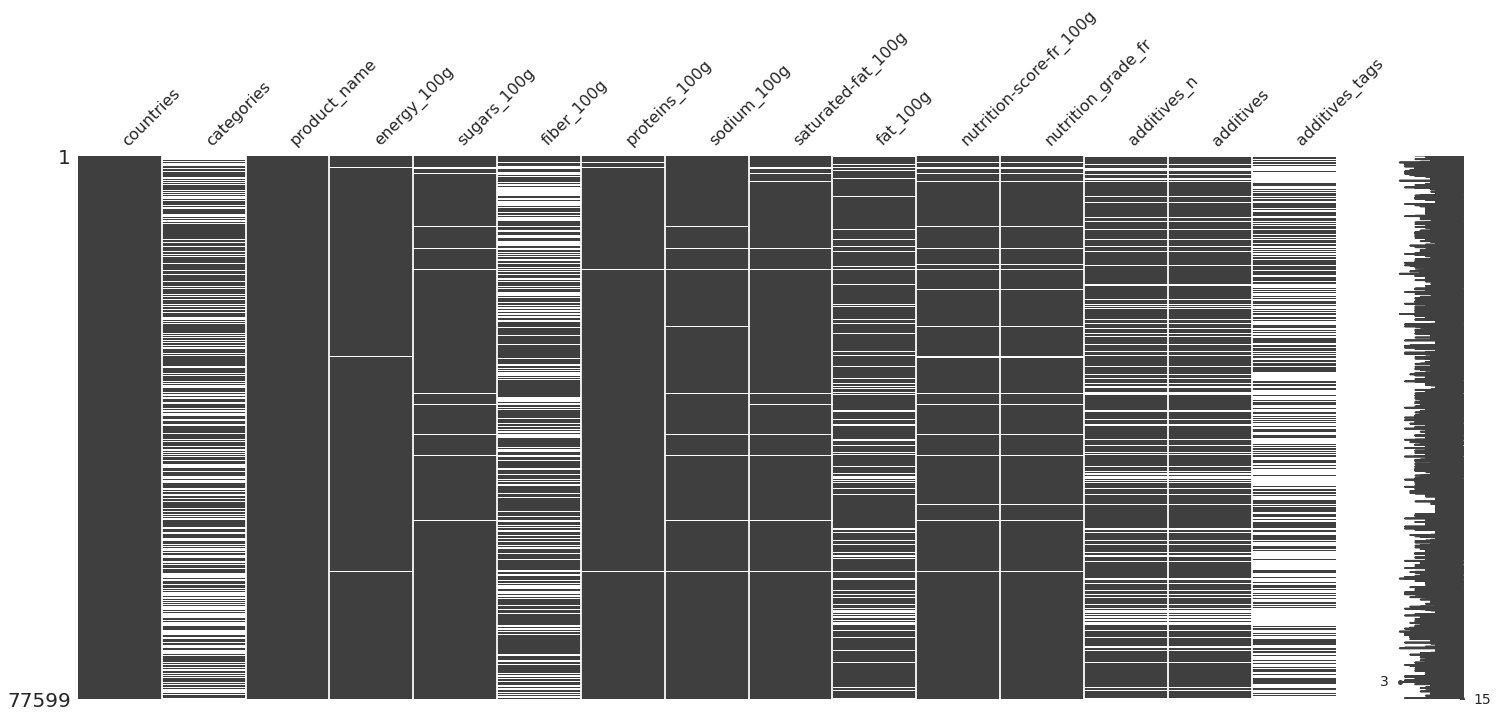

In [90]:
msno.matrix(data)

In [91]:
data.shape

(77599, 15)

In [92]:
data["nutrition_grade_fr"].isnull().sum() 

3183

In [93]:
your_list = ['fat_100g','energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'saturated-fat_100g']
for i in your_list:
    data.loc[data[i].isnull(),i]=0

## Boucle qui permet de remplacer par 0 les lignes manquantes dans les colonnes

In [94]:
data = data[data["nutrition_grade_fr"].isnull() == False]

<AxesSubplot:>

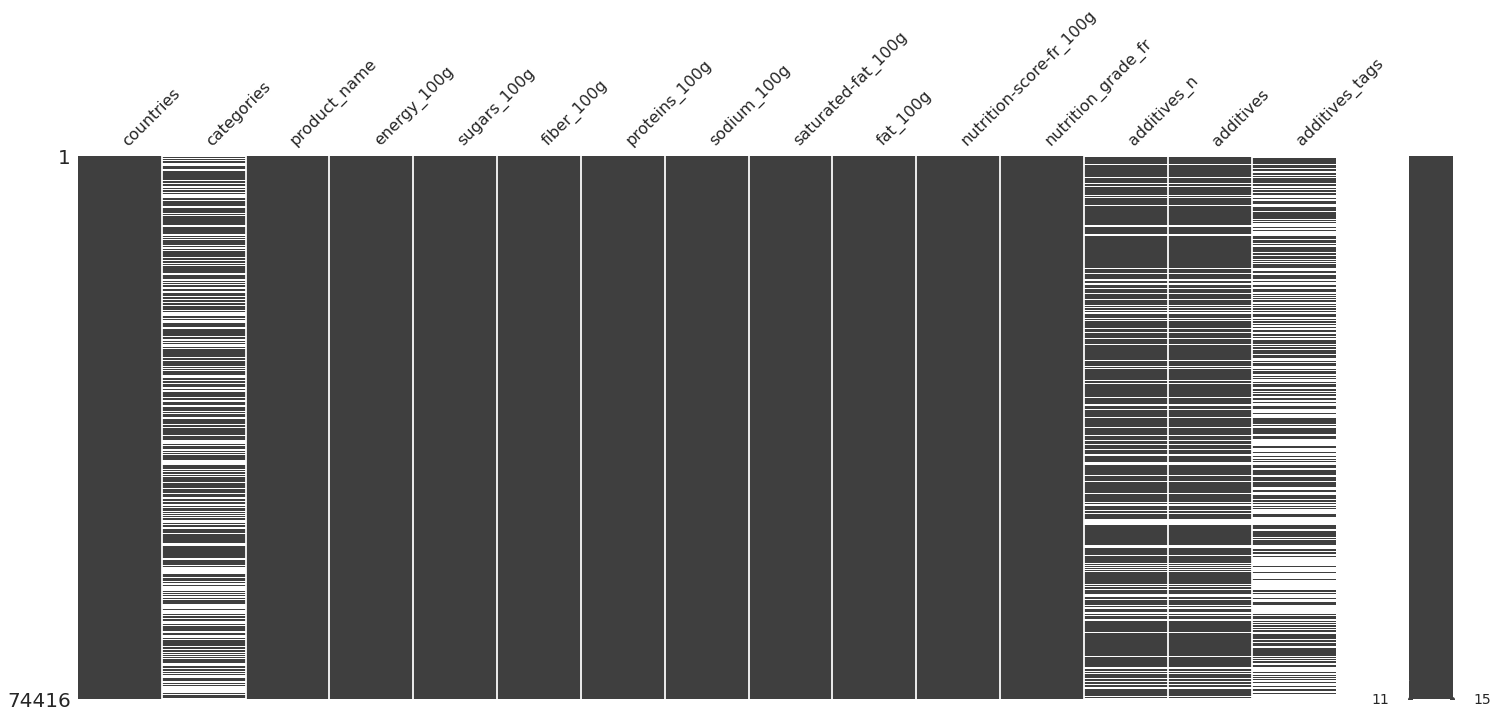

In [95]:
msno.matrix(data)

In [96]:
data.head()

countries                                         categories  \
185    France  Boissons,Boissons gazeuses,Sodas,Boissons sucr...   
189    France                  Snacks sucrés,Confiseries,Bonbons   
190    France                                       en:beverages   
193    France                                                NaN   
194    France                                                NaN   

                                          product_name  energy_100g  \
185                                          Root Beer        215.0   
189      Gotta-have grape, seriously strawberry flavor       1667.0   
190              Thé noir aromatisé violette et fleurs         17.0   
193  Preparation mug cake chocolat-caramel au beurr...       1632.0   
194                                     Mini Confettis       1753.0   

     sugars_100g  fiber_100g  proteins_100g  sodium_100g  saturated-fat_100g  \
185         13.6         0.0            0.0     0.024200                 0.0   
189         93.3         0.0            0.0     0.000000                 0.0   
190          0.1         0.0            0.1     0.000394                 0.1   
193         42.0         0.0            7.0     0.383858                 4.5   
194         87.7         0.9            0.6     0.003937                 0.8   

     fat_100g  nutrition-score-fr_100g nutrition_grade_fr  additives_n  \
185       0.0                     18.0                  e          3.0   
189       0.0                     14.0                  d          NaN   
190       0.1                      2.0                  c          0.0   
193       7.0                     21.0                  e          4.0   
194       0.0                     14.0                  d          NaN   

                                             additives  \
185   [ eau-gazeifiee -> fr:eau-gazeifiee  ]  [ eau...   
189                                                NaN   
190   [ the-noir-aromatise-a-la-fleur-de-violette -...   
193   [ farine-de-ble -> fr:farine-de-ble  ]  [ far...   
194                                                NaN   

                                        additives_tags  
185                            en:e150,en:e211,en:e999  
189                                                NaN  
190                                                NaN  
193  en:e322,en:e322i,en:e450,en:e473,en:e500,en:e5...  
194                                                NaN

/home/apprenant/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of height')

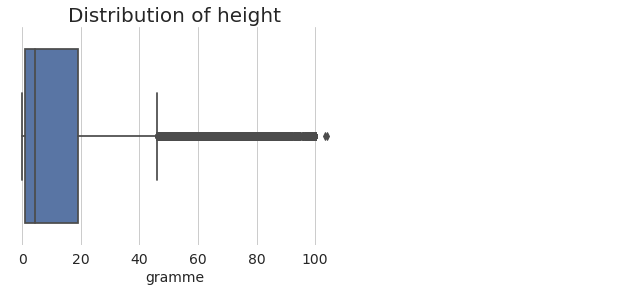

In [97]:
ax = sns.boxplot(data.sugars_100g)

# notation indicating an outlier
ax.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('gramme', fontsize=14)
plt.title('Distribution of height', fontsize=20)

In [98]:
nrj_outliers = data.loc[data["energy_100g"] > 3800 ]

In [99]:
data.shape

(74416, 15)

In [100]:
data = data.drop(nrj_outliers.index, axis=0)

In [101]:
nrj_outliers = data.loc

In [102]:
sugars_outliers = data.loc[data["sugars_100g"] > 100 ]
sugars_outliers1 = data.loc[data["sugars_100g"] < 0 ]
fiber_outliers = data.loc[data["fiber_100g"] > 100 ]
fiber_outliers1 = data.loc[data["fiber_100g"] < 0 ]
proteins_outliers = data.loc[data["proteins_100g"] > 100 ]
proteins_outliers1 = data.loc[data["proteins_100g"] < 0 ]
sodium_outliers = data.loc[data["sodium_100g"] > 100 ]
sodium_outliers1 = data.loc[data["sodium_100g"] < 0 ]
fat_outliers = data.loc[data["fat_100g"] > 100 ]
fat_outliers1 = data.loc[data["fat_100g"] < 0 ]



## Supprime ttes les valeurs sup 100 et inf 0  

In [103]:
fat_outliers

countries          categories              product_name  energy_100g  \
336897    France  Céréales en grains  Graine de couscous moyen       1482.0   

        sugars_100g  fiber_100g  proteins_100g  sodium_100g  \
336897          2.5         0.0           12.0     0.003937   

        saturated-fat_100g  fat_100g  nutrition-score-fr_100g  \
336897                 0.3     105.0                     -1.0   

       nutrition_grade_fr  additives_n additives additives_tags  
336897                  a          NaN       NaN            NaN

In [104]:
fiber_outliers1.shape

(0, 15)

In [105]:
data = data.drop(sugars_outliers1.index, axis=0)
data = data.drop(sugars_outliers.index, axis=0)
data = data.drop(proteins_outliers.index, axis=0)
data = data.drop(fiber_outliers.index, axis=0)





In [106]:
data.head()

countries                                         categories  \
185    France  Boissons,Boissons gazeuses,Sodas,Boissons sucr...   
189    France                  Snacks sucrés,Confiseries,Bonbons   
190    France                                       en:beverages   
193    France                                                NaN   
194    France                                                NaN   

                                          product_name  energy_100g  \
185                                          Root Beer        215.0   
189      Gotta-have grape, seriously strawberry flavor       1667.0   
190              Thé noir aromatisé violette et fleurs         17.0   
193  Preparation mug cake chocolat-caramel au beurr...       1632.0   
194                                     Mini Confettis       1753.0   

     sugars_100g  fiber_100g  proteins_100g  sodium_100g  saturated-fat_100g  \
185         13.6         0.0            0.0     0.024200                 0.0   
189         93.3         0.0            0.0     0.000000                 0.0   
190          0.1         0.0            0.1     0.000394                 0.1   
193         42.0         0.0            7.0     0.383858                 4.5   
194         87.7         0.9            0.6     0.003937                 0.8   

     fat_100g  nutrition-score-fr_100g nutrition_grade_fr  additives_n  \
185       0.0                     18.0                  e          3.0   
189       0.0                     14.0                  d          NaN   
190       0.1                      2.0                  c          0.0   
193       7.0                     21.0                  e          4.0   
194       0.0                     14.0                  d          NaN   

                                             additives  \
185   [ eau-gazeifiee -> fr:eau-gazeifiee  ]  [ eau...   
189                                                NaN   
190   [ the-noir-aromatise-a-la-fleur-de-violette -...   
193   [ farine-de-ble -> fr:farine-de-ble  ]  [ far...   
194                                                NaN   

                                        additives_tags  
185                            en:e150,en:e211,en:e999  
189                                                NaN  
190                                                NaN  
193  en:e322,en:e322i,en:e450,en:e473,en:e500,en:e5...  
194                                                NaN

In [107]:
data.shape

(74344, 15)

/home/apprenant/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of height')

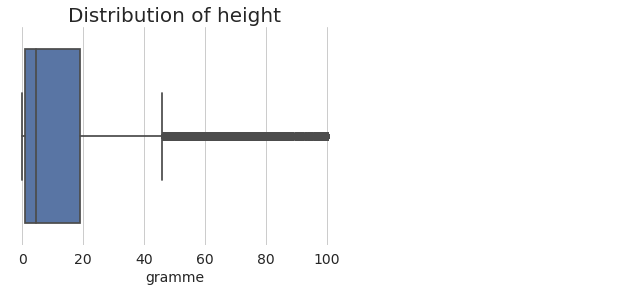

In [108]:
ax = sns.boxplot(data.sugars_100g)

# notation indicating an outlier
ax.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('gramme', fontsize=14)
plt.title('Distribution of height', fontsize=20)

In [111]:
data.shape

(74344, 15)